# <center> Case Study 2 </center>

In [1]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading data from csv file
df = pd.read_csv("CaseStudy.csv")
df.head()

,Unnamed: 0,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015


####  Total revenue for the current year

In [3]:
#total revenu for current year 2015
total_revenue_2015 = round(df.query("year == 2015")["net_revenue"].sum(), 3)
total_revenue_2015

29036749.19

Total revenue for current year 2015 is 29036749.19.

In [4]:
#total revenu for current year 2016
total_revenue_2016 = round(df.query("year == 2016")["net_revenue"].sum(), 3)
total_revenue_2016

25730943.59

Total revenue for current year 2016 is 25730943.59.

In [5]:
#total revenu for current year 2017
total_revenue_2017 = round(df.query("year == 2017")["net_revenue"].sum(), 3)
total_revenue_2017

31417495.03

Total revenue for current year 2017 is 31417495.03.

#### New Customer Revenue e.g. new customers not present in previous year only

In [6]:
#separating data for years 2015, 2016 and 2017
df_2015 = df[df["year"] == 2015]
df_2016 = df[df["year"] == 2016]
df_2017 = df[df["year"] == 2017]

In [7]:
#new customer_revenue in 2016
d_2016 = df[(df["customer_email"].isin(df_2016["customer_email"].unique()) & ~df["customer_email"].isin(df_2015["customer_email"].unique()))]
new_customer_revenue_2016 = d_2016[d_2016["year"] == 2016]["net_revenue"].sum()
new_customer_revenue_2016

18245491.01

New customer revenue for 2016 is 18245491.01.

In [8]:
#new customer_revenue in 2017
d_2017 = df[(df["customer_email"].isin(df_2017["customer_email"].unique()) & ~df["customer_email"].isin(df_2015["customer_email"].unique()) & ~df["customer_email"].isin(df_2016["customer_email"].unique()))]
new_customer_revenue_2017 = d_2017[d_2017["year"] == 2017]["net_revenue"].sum()
new_customer_revenue_2017

28676607.64

New customer revenue for 2016 is 28676607.64.

####  Existing Customer Growth. To calculate this, use the Revenue of existing customers for current year –(minus) Revenue of existing customers from the previous year

In [9]:
#customer growth for year 2016 compare to 2015
d_2015_2016= df[(~df["customer_email"].isin(df_2017["customer_email"].unique()) & df["customer_email"].isin(df_2015["customer_email"].unique()) & df["customer_email"].isin(df_2016["customer_email"].unique()))]
customer_growth_2016 = d_2015_2016[d_2015_2016["year"] == 2016]["net_revenue"].sum() - d_2015_2016[d_2015_2016["year"] == 2015]["net_revenue"].sum()
customer_growth_2016 = round(customer_growth_2016, 3)
customer_growth_2016

20669.94

Existing customers growth in 2016 as compare to 2015 is 20669.94.

In [10]:
#customer growth for year 2017 compare to 2016
d_2016_2017= df[(df["customer_email"].isin(df_2017["customer_email"].unique()) & ~df["customer_email"].isin(df_2015["customer_email"].unique()) & df["customer_email"].isin(df_2016["customer_email"].unique()))]
customer_growth_2017 = d_2016_2017[d_2016_2017["year"] == 2017]["net_revenue"].sum() - d_2016_2017[d_2016_2017["year"] == 2016]["net_revenue"].sum()
customer_growth_2017 = round(customer_growth_2017, 3)
customer_growth_2017

28751.41

Existing customers growth in 2017 as compare to 2016 is 28751.41.

#### Revenue lost from attrition

In [11]:
#revenue lost from attrition in 2016 as compare to 2015
df2 = df[(df["customer_email"].isin(df_2015["customer_email"].unique()) & ~ df["customer_email"].isin(df_2016["customer_email"].unique()) & ~ df["customer_email"].isin(df_2017["customer_email"].unique()))]
revenue_lost_2016 = round(df2["net_revenue"].sum(), 3)
revenue_lost_2016

21476000.7

The revenue lost from attrition in 2016 is 21476000.7.

In [12]:
un = set(df_2015["customer_email"]).difference(set(df_2016["customer_email"]))
df_2015[df_2015["customer_email"].isin(un)]["net_revenue"].sum()

21571632.070000004

In [13]:
#revnue lost from attrition in 2017 as compare to 2016
df3 = df[(df["customer_email"].isin(df_2015["customer_email"].unique()) & df["customer_email"].isin(df_2016["customer_email"].unique()) & ~ df["customer_email"].isin(df_2017["customer_email"].unique()))]
revenue_lost_2017 = round(df3["net_revenue"].sum(), 3)
revenue_lost_2017

13405179.62

The revenue lost from attrition in 2016 is 13405179.62.

#### Existing Customer Revenue Current Year

In [14]:
#existing customer revnue in for current year 2016
df3 = df[df["year"] != 2017]
df3 = df3[(df3["customer_email"].isin(df_2015["customer_email"].unique()) & df3["customer_email"].isin(df_2016["customer_email"].unique()))]
df3[df3["year"] == 2016]["net_revenue"].sum()

7485452.58

The revenue generated from existing customers in current year 2016 is 7485452.58.

In [15]:
#existing customer revnue in 2017
df3 = df[df["year"] != 2015]
df3 = df3[(df3["customer_email"].isin(df_2016["customer_email"].unique()) & df3["customer_email"].isin(df_2017["customer_email"].unique()))]
df3[df3["year"] == 2017]["net_revenue"].sum()

2641259.99

The revnue generated from existing customers in 2017 is 2641259.99.

#### Existing Customer Revenue Prior Year

In [16]:
#existing customer revnue in prior year 2015
df3 = df[df["year"] != 2017]
df3 = df3[(df3["customer_email"].isin(df_2015["customer_email"].unique()) & df3["customer_email"].isin(df_2016["customer_email"].unique()))]
df3[df3["year"] == 2015]["net_revenue"].sum()

7465117.12

The revenue generated from existing customers in prior year 2015 is 7465117.12.

In [17]:
#existing customer revnue in prior year 2016
df3 = df[df["year"] != 2015]
df3 = df3[(df3["customer_email"].isin(df_2016["customer_email"].unique()) & df3["customer_email"].isin(df_2017["customer_email"].unique()))]
df3[df3["year"] == 2016]["net_revenue"].sum()

2620648.65

The revenue generated from existing customer in prior year 2016 is 2620648.65.

#### Total Customers Current Year

In [18]:
#total customers in 2016
df[df["year"] == 2016]["customer_email"].nunique()

204646

There are total 204646 customers in 2016.

In [19]:
#total customers in 2017
df[df["year"] == 2017]["customer_email"].nunique()

249987

There are total 249987 customers in 2017.

#### Total Customers Previous Year

In [20]:
#total customers in year 2015
df[df["year"] == 2015]["customer_email"].nunique()

231294

There are total 231294 customers in year 2015.

In [21]:
#total customers in year 2016
df[df["year"] == 2016]["customer_email"].nunique()

204646

There are total 204646 customers in year 2016.

#### New Customers

In [22]:
#new customers in 2016
df2 = df[df["year"] != 2017]
df3 = df2[(df2["customer_email"].isin(df_2016["customer_email"].unique())) & (~df2["customer_email"].isin(df_2015["customer_email"].unique()))]
df3['customer_email'].nunique()

145062

There are total 145062 new customers in 2016.

In [23]:
#new customers in 2017
df3 = df[(df["customer_email"].isin(df_2017["customer_email"].unique())) & (~df["customer_email"].isin(df_2015["customer_email"].unique())) & (~df["customer_email"].isin(df_2016["customer_email"].unique()))]
df3['customer_email'].nunique()

228262

There are total 228262 new customers in year 2017.

#### Lost Customers

In [24]:
#lost customers in 2016
df_l_2016 = df[(df["customer_email"].isin(df_2015["customer_email"].unique())) & (~df["customer_email"].isin(df_2016["customer_email"].unique())) &
               (~df["customer_email"].isin(df_2017["customer_email"].unique()))]
df_l_2016["customer_email"].nunique()

170944

There are total 170944 lost customers in 2016.

In [25]:
#lost customers in 2017
df_l_2017 = df[(df["customer_email"].isin(df_2017["customer_email"].unique())) & (~df["customer_email"].isin(df_2016["customer_email"].unique())) &
               (~df["customer_email"].isin(df_2015["customer_email"].unique()))]
df_l_2017["customer_email"].nunique()

228262

There are total 228262 customers lost in year 2017.

#### Additionally, generate a few unique plots highlighting some information from the dataset. Are there any interesting observations?

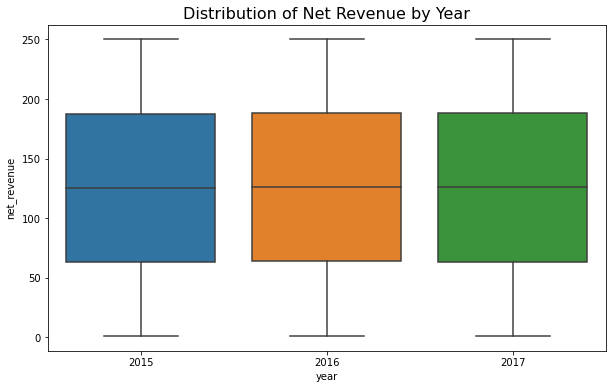

In [26]:
#plotting distribution of net_revenue by year
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,6))
sns.boxplot(x = "year", y = "net_revenue", data = df)
plt.title("Distribution of Net Revenue by Year", fontsize = 16)
plt.show()

From above plot, it can be seen that there is not significant difference in the distribution of revnue for year 2015 2016 and 2017 and the average revnue for each three years is almost same.

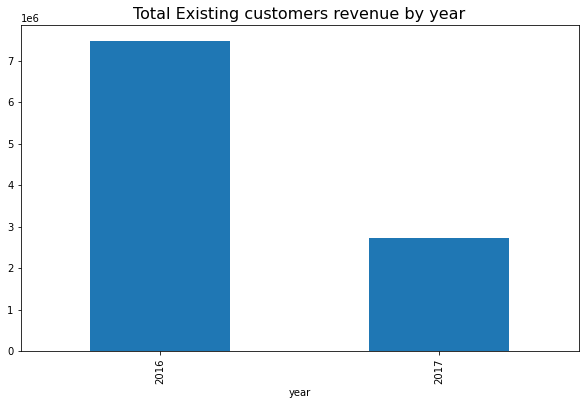

In [27]:
#plotting distribution of existing customers revenue by year
df2 = df[df["year"] != 2017]
df3 = df2[(df2["customer_email"].isin(df_2016["customer_email"].unique())) & (df2["customer_email"].isin(df_2015["customer_email"].unique()))]
df3 = df3[df3["year"] == 2016]
df4 = df[(df["customer_email"].isin(df_2017["customer_email"].unique())) & (df["customer_email"].isin(df_2015["customer_email"].unique()) | df["customer_email"].isin(df_2016["customer_email"].unique()))]
df5 = df4[df4["year"] == 2017]
dff = pd.concat([df3, df5])
#plt.figure()
dff.groupby("year")["net_revenue"].sum().plot(kind = "bar", figsize = (10, 6))
plt.title("Total Existing customers revenue by year", fontsize = 16)
plt.show()

From above plot, it is pretty evident that the revenue for exisiting customers in 2016 is much higher as compare to the revnue in 2017.

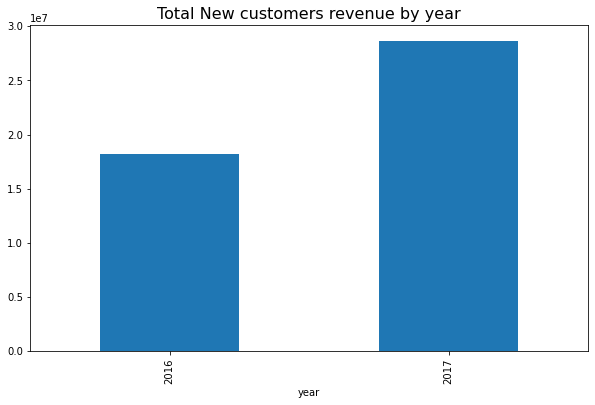

In [28]:
#plotting total revenue for new customers by year
df2 = df[df["year"] != 2017]
df3 = df2[(df2["customer_email"].isin(df_2016["customer_email"].unique()) & ~df2["customer_email"].isin(df_2015["customer_email"].unique()))]
df4 = df[(df["customer_email"].isin(df_2017["customer_email"].unique()) & ~df["customer_email"].isin(df_2016["customer_email"].unique()) & ~df["customer_email"].isin(df_2015["customer_email"].unique()))]
df5 = pd.concat([df3, df4])
df5.groupby("year")["net_revenue"].sum().plot(kind = "bar", figsize = (10, 6))
plt.title("Total New customers revenue by year", fontsize = 16)
plt.show()

From above plot, it is pretty clear that the new customers revnue in 2017 is much high as compare to the new customers revnue in 2016.